### Classification Binary

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

random_state - is like seed when programming normal python. It gives same number to everyone. Test - 2%(200), training - 80%(800)

In [2]:
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creates model. shape=(2,) - input layer has two numbers(x , y). Dense(16, relu) - model is learning unlinear things(hidden layer). Dense(1, sigmoid) - output layer 

In [3]:
model = tf.keras.Sequential([
 tf.keras.layers.Input(shape=(2,)),
 tf.keras.layers.Dense(32, activation="relu"),
 tf.keras.layers.Dense(32, activation="relu"),
 tf.keras.layers.Dense(32, activation="relu"),
 tf.keras.layers.Dense(1, activation="sigmoid")
])

Compile. binary_crossentropy - right loss for bianry classification, minimalizes loss of data. Adam - optimizer. 

In [4]:
model.compile(
 loss="binary_crossentropy",
 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
 metrics=["accuracy"]
)

Fit. 25 times goes through train data. history - to save data

In [5]:
callback = tf.keras.callbacks.EarlyStopping(
    patience=20,
    restore_best_weights=True
)

history = model.fit(X_train, y_train, epochs=70, validation_split=0.2, verbose=1)

Epoch 1/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5359 - loss: 0.6877 - val_accuracy: 0.6313 - val_loss: 0.6789
Epoch 2/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6578 - loss: 0.6552 - val_accuracy: 0.6938 - val_loss: 0.6291
Epoch 3/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7750 - loss: 0.5361 - val_accuracy: 0.8375 - val_loss: 0.4300
Epoch 4/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9297 - loss: 0.2954 - val_accuracy: 1.0000 - val_loss: 0.1151
Epoch 5/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9828 - loss: 0.0888 - val_accuracy: 1.0000 - val_loss: 0.0391
Epoch 6/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9937 - loss: 0.0355 - val_accuracy: 1.0000 - val_loss: 0.0172
Epoch 7/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9844 - loss: 0.0418 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 8/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9812 - loss: 0.0489 - val_accuracy: 0.9875 - v

Evaluate - check model with new data. acc - how many right answers. 

In [6]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.3f}")

Test accuracy: 1.000


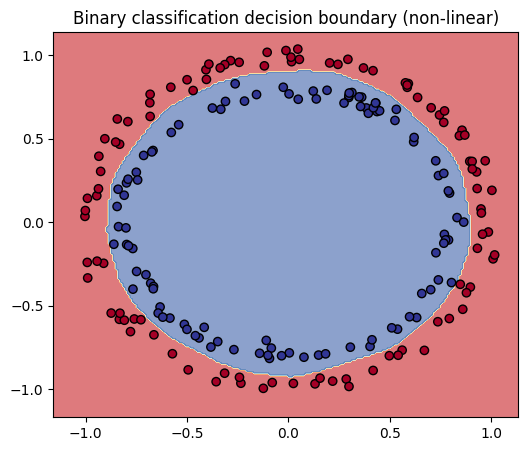

In [7]:
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.1, X[:,0].max()+0.1, 200),
    np.linspace(X[:,1].min()-0.1, X[:,1].max()+0.1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid, verbose=0).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, (probs>0.5).astype(int), cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.title("Binary classification decision boundary (non-linear)")

plt.show()

on first try model did pretty good. But i tried to improve it. Firstly I changed epochs to 100. i became kinda worse a little but still good. then i tried epochs to 70 and it became better, decition boundarry became smoother.

Next i tried to put learning rate smaller to 0.01, it also improved model

Then I used more neuronse, I have putted dense to 32, with impoved model even more

Next I added validation_split

and as a last thing I added early stopping, which made model close to perfect

then I added 3 more layers: tf.keras.layers.Dense(32, activation="tanh"), it helped a little

then changed activation to tanh, it became way better